In [66]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy
import sklearn

In [220]:
contents = open("data/(1) The Hunger Games.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(2) Catching Fire.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.1) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.2) Mockingjay.txt", "r", encoding='utf-8').read()

In [221]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').split(".")

In [222]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1

# keep only frequent words occurences
for word in tmp_dictionary:
    if tmp_dictionary[word] > 5 and len(word) > 1:
        dictionary.append(word)
        #print(word + " - " + str(tmp_dictionary[word]))
        
print(len(dictionary))

3774


In [223]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            prev_word = word
            
# keep only frequent dimensions occurences
for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 0:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

110330


In [224]:
# create vector
vector = np.zeros((len(dictionary), len(vector_dimensions)))

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension in vector_dimensions:
                vector[dictionary.index(word), vector_dimensions.index(dimension)] = 1

In [225]:
#reduce dimensions
pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(vector)

pca = PCA(n_components = 100)
vector_100D = pca.fit_transform(vector)

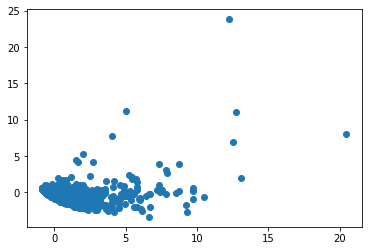

In [226]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1])
plt.show()

In [227]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(vector_100D)

In [228]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

hunger - nuts - 1.9710749947873065
games - tributes - 4.552590199055841
the - my - 31.704158965861453
part - country - 1.7486612048216597
tributes - victors - 3.848660886564056
when - where - 4.33498895541427
wake - trusted - 2.076472174275752
up - down - 5.9157592756741995
other - many - 5.519575263767072
side - box - 2.782028360092579
of - with - 22.44637233537666
bed - confusion - 2.7355368606162713
is - re - 14.15848626916213
cold - oil - 2.618131267830016
my - your - 17.414947571376363
fingers - feet - 3.6191128299135262
stretch - suspicion - 1.887282956465191
out - off - 5.422753443630581
seeking - spreading - 1.4851212765731672
prims - upright - 0.5971896181397599
warmth - cloak - 1.6652716405186871
but - because - 13.75903972597306
finding - beside - 2.0256634799369895
only - least - 11.55735903342604
rough - rice - 0.49103145973137774
cover - covers - 3.4439335449924076
mattress - forearm - 0.6036324548184826
she - haymitch - 14.373008083837169
must - should - 2.69439781082896

minutes - streets - 2.053983105147058
start - begin - 3.668537374291635
runs - sweeps - 2.860376197097936
grow - whispers - 1.357840908733305
familiar - altered - 1.744431333564731
hell - dried - 2.0545868572192973
bring - holding - 3.161384170016828
should - must - 2.6943978108289652
medicine - money - 2.586479789131749
suggesting - fact - 0.6483941364255025
learn - granted - 1.9198531231012286
teach - warn - 1.3647945481622012
whenever - avoiding - 1.4173623131660262
heal - blew - 0.9999717942468889
instructions - early - 1.608085775729893
fuel - starve - 0.14889666112871666
trading - pausing - 1.1157477616493492
staying - elbows - 1.6954327146164507
grip - guarantee - 1.8755649057735824
intensity - valley - 0.8826116082711922
floor - streets - 2.1006489828095645
screen - gloves - 2.142091451126237
promise - opposite - 1.9432862928689427
it! - do! - 2.2202350123486303
shout - attached - 2.1699805658120233
grasp - choking - 1.4227519192742812
treated - cruel - 1.7321741400276824
suffe

hundred - dozen - 1.2059679074822227
please - fails - 0.5060626971458281
strange - jokes - 1.6622526726409608
loop - height - 1.3594789696645433
packed - compared - 1.4194810400933753
president - feathers - 2.0393440686983557
mansion - stone - 1.242330121160689
balcony - jumpsuit - 0.6811854200479552
speech - lived - 2.129901933130526
share - record - 2.2068511736692
airtime - greasy - 0.0009730203155432896
becomes - unfortunately - 1.3109302596293524
difficult - scheduled - 1.6898487808329206
flickering - rigid - 1.2325535886508114
disappears - syringe - 1.7351998015207335
nearly - fluffy - 0.8431043782939125
praise - credit - 2.9802322387695312e-08
shooting - balcony - 2.7307418993301744
confirms - fortunately - 1.2926871162008988
literally - wasting - 0.988869671028182
spray - illusion - 5.1619136559035694e-08
glued - clinging - 0.962910762349329
shaky - purple - 0.2150926598020647
rushes - curved - 1.2216096934572325
warning - threat - 0.9328790316165801
planning - refuses - 1.8095

bringing - invite - 1.7695868868702649
ally - shop - 0.5714542140937773
kills - distorted - 1.669487435904935
tentatively - muttations - 0.2728093081580473
fix - awaits - 1.76081368447255
huh - greasy - 0.0009730203155432896
roasted - slung - 0.4063286392540606
groosling - jackson - 1.4397905832743216
communication - operate - 0.25449384719089874
useless - scarf - 1.2177328894915591
shrug - dandelion - 1.2376523550137495
haven - mutter - 0.047035765239782555
covering - examines - 0.5140956862661232
motivated - accompanied - 1.3421644328730158
nor - insisting - 1.679192996697525
distracted - pearls - 0.1630774881233228
latest - annual - 0.24824658811814193
washed - blew - 1.5062215020331173
disadvantage - standard - 0.7854918676323706
backs - sideways - 1.7383916960629562
nine - chicken - 0.3356072598995306
recovered - confess - 0.42323846158600026
briefly - neatly - 1.0482227929235048
dump - hating - 0.6443098569744851
loves - invite - 1.613491509094032
replies - greasy - 0.24327969496

In [233]:
dist_matrix[dictionary.index("five"), dictionary.index("four")]

2.7663306100449367